# Schnittpunkt und Schnittwinkel zweier Geraden

## Bibliotheken importieren

In [6]:
import numpy as np

In [7]:
import numpy.linalg as la

In [8]:
import matplotlib.pyplot as pl

In [9]:
import ipywidgets as iw

## Geraden definieren

### 4 Punkte

<a href="https://de.wikipedia.org/wiki/Liste_der_Flugh%C3%A4fen_in_der_Schweiz">Standorte der 11 Schweizer Regionalflugplätze</a>
<br/>
Koordinaten in Schweizer Landeskoordinaten CH1903/LV03 (veraltet): 
<a href="https://de.wikipedia.org/wiki/Schweizer_Landeskoordinaten">Wikipedia</a> /
<a href="https://www.swisstopo.admin.ch/de/wissen-fakten/geodaesie-vermessung/bezugsysteme/kartenprojektionen.html">swisstopo</a>
<br/>
<a href="https://www.swisstopo.admin.ch/de/karten-daten-online/karten-geodaten-online/kartenviewer.html">Link zur Online-Karte von swisstopo</a>

#### 1. Flugplatz Lausanne - La Blécherette

<a href="https://geohack.toolforge.org/geohack.php?pagename=Liste_der_Flugh%C3%A4fen_in_der_Schweiz&language=de&params=46.545277777778_N_6.6166666666667_E_region:CH_type:landmark&title=%5B%5BFlugplatz+Lausanne-La+Bl%C3%A9cherette%7CLausanne%5D%5D">Wikipedia</a>
/
<a href="https://s.geo.admin.ch/a1ce2e0bcd">swisstopo</a>

Als Vektor in mathematischer Schreibweise

$ \mathrm{p} = \begin{pmatrix} 536.955 \\ 155.219 \end{pmatrix} $

In Python / NumPy

In [10]:
p = np.array ([
    [536.955],
    [155.219]
])

#### 2. Flugplatz St. Gallen - Altenrhein

<a href="https://geohack.toolforge.org/geohack.php?pagename=Liste_der_Flugh%C3%A4fen_in_der_Schweiz&language=de&params=47.485027777778_N_9.5607777777778_E_region:CH_type:landmark&title=%5B%5BFlugplatz+St.+Gallen-Altenrhein%7CSt.+Gallen-Altenrhein%5D%5D">Wikipedia</a>
/
<a href="https://s.geo.admin.ch/a1ce2ec299">swisstopo</a>

In [11]:
r = np.array ([
    [759.925],
    [261.525]
])

#### 3. Flugplatz Birrfeld

<a href="https://geohack.toolforge.org/geohack.php?pagename=Liste_der_Flugh%C3%A4fen_in_der_Schweiz&language=de&params=47.443333333333_N_8.2338888888889_E_region:CH_type:landmark&title=%5B%5BFlugplatz+Birrfeld%7CBirrfeld%5D%5D">Wikipedia</a>
/
<a href="https://s.geo.admin.ch/a1cdd71ce9">swisstopo</a>

In [12]:
q = np.array ([
    [659.984],
    [255.030]
])

#### 4. Flughafen Lugano

<a href="https://geohack.toolforge.org/geohack.php?pagename=Liste_der_Flugh%C3%A4fen_in_der_Schweiz&language=de&params=46.004166666667_N_8.9105555555556_E_region:CH_type:landmark&title=%5B%5BFlughafen+Lugano%7CLugano%5D%5D">Wikipedia</a>
/
<a href="https://s.geo.admin.ch/a1cdd9c785">swisstopo</a>

In [13]:
s = np.array ([
    [714.020],
    [95.804]
])

### 2 Geraden

#### 1. Flug von Blecherette nach Altenrhein

$ \mathrm{g} \, (y) \; = \; (1 - y) \, \mathrm{p} + y \, \mathrm{r} \;; \qquad y \in [0, 1] $

##### Mathematisch als Gerade in Punkt-Richtungs-Form

$ g
\; = \; \mathrm{p} - y \, \mathrm{p} + y \, \mathrm{r}
\; = \; \mathrm{p} + y \, (\mathrm{r} - \mathrm{p})
\; = \; \mathrm{p} + y \, \mathrm{u} \;; \qquad \mathrm{u} \; = \; \mathrm{r} - \mathrm{p}
$

##### Richtungsvektor in Python

In [14]:
u = r - p
print (u)

[[222.97 ]
 [106.306]]


##### Geradengleichung

$
\mathrm{g} \, (y)
\; = \; \begin{pmatrix} 536.955 \\ 155.219 \end{pmatrix}
+ y \, \begin{pmatrix} 222.970 \\ 106.306 \end{pmatrix}
$

#### 2. Flug von Birrfeld nach Lugano

In [15]:
v = s - q
print (v)

[[  54.036]
 [-159.226]]


##### Geradengleichung

$
\mathrm{h} \, (z)
\; = \; \begin{pmatrix} 659.984 \\ 255.030 \end{pmatrix}
+ z \, \begin{pmatrix} 54.036 \\ -159.226 \end{pmatrix}
$

#### Beide Flugrouten zeichnen

In [16]:
def PlotVec (p, u, c):
    pl.arrow (p [0] [0], p [1] [0], u [0] [0], u [1] [0],
        color = c,
        head_width = 5,
        length_includes_head = True,
        fill = False)

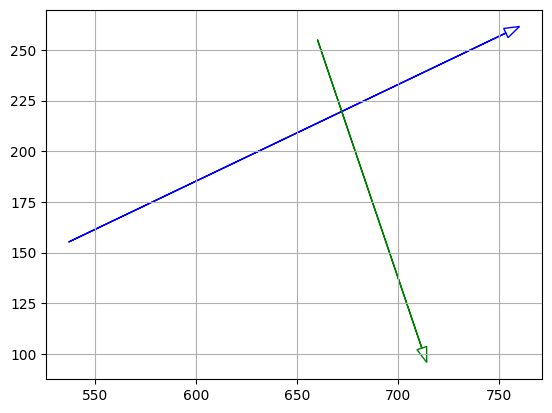

In [17]:
PlotVec (p, u, 'blue')
PlotVec (q, v, 'green')
pl.axis ('equal')
pl.grid ()

#### Schnittpunkt berechnen

##### Experimentell (interaktiv)

In [18]:
def PlotPnt (p, c):
    pl.plot (p [0], p [1], 'o', color = c)

In [19]:
def Callback1 (y, z):
    g = p + y * u; PlotVec (p, u, 'blue' ); PlotPnt (g, 'blue' )
    h = q + z * v; PlotVec (q, v, 'green'); PlotPnt (h, 'green')
    pl.axis ('equal')
    pl.grid ()
    
# Callback1 (0.1, 0.9)

In [20]:
Slider11 = iw.FloatSlider (min = -0.1, max = 1.1, step = 0.001, value = 0.5, description = 'y [%]')
Slider12 = iw.FloatSlider (min = -0.1, max = 1.1, step = 0.001, value = 0.5, description = 'z [%]')
UserInterface1 = iw.HBox ([Slider11, Slider12])
Output1 = iw.interactive_output (Callback1, {'y': Slider11, 'z': Slider12})

In [21]:
display (UserInterface1, Output1)

Output()

##### Berechnung (Mathematik)

###### vektoriell

$ \mathrm{g} \, (y) = \mathrm{h} \, (z) $

$ p + y \, \mathrm{u} = q + z \, \mathrm{v} $

$
y \, \mathrm{u} - z \, \mathrm{v}
    \; = \; \mathrm{q} - \mathrm{p}
$

$
y \, \begin{pmatrix} u_1 \\ u_2 \end{pmatrix} - z \, \begin{pmatrix} v_1 \\ v_2 \end{pmatrix}
    \; = \; \begin{pmatrix} y \, u_1 \\ y \, u_2 \end{pmatrix} - \begin{pmatrix} z \, v_1 \\ z \, v_2 \end{pmatrix}
    \; = \; \begin{pmatrix} y \, u_1 - z \, v_1 \\ z \, u_2 - z \, v_2 \end{pmatrix}
    \quad = \quad \begin{pmatrix} q_1 \\ q_2 \end{pmatrix} - \begin{pmatrix} p_1 \\ p_2 \end{pmatrix}
    \; = \; \begin{pmatrix} q_1 - p_1 \\ q_2 - p_2 \end{pmatrix}
$

###### als 2 x 2 - Gleichungssystem

$\begin{align}
u_1 \, y - v_1 \, z &\;=\; q_1 - p_1 \\
u_2 \, y - v_2 \, z &\;=\; q_2 - p_2
\end{align}$

###### in Matrixform

$
\begin{pmatrix} u_1 \, y - v_1 \, z \\ u_2 \, y - v_2 \, z \end{pmatrix}
    \; = \; \begin{pmatrix} u_1 & - \, v_1 \\ u_2 & - v_2 \end{pmatrix}
        \begin{pmatrix} y \\ z \end{pmatrix}
    \; = \; \begin{pmatrix} q_1 - p_1 \\ q_2 - p_2 \end{pmatrix}
$

$
    \mathrm{A} \, \mathrm{x} \; = \; \mathrm{b} \;;
        \qquad \mathrm{A} \; = \; \begin{pmatrix} u_1 & - v_1 \\ u_2 & - v_2\end{pmatrix} \;;
        \qquad \mathrm{x} \; = \; \begin{pmatrix} y \\ z \end{pmatrix} \;;
        \qquad \mathrm{b} \; = \; \begin{pmatrix} q_1 - p_1 \\ u_2 - p_2 \end{pmatrix}
$

##### Berechnung (Python)

In [22]:
A = np.concatenate ((u, -v), axis = 1)
print (A)

[[222.97  -54.036]
 [106.306 159.226]]


In [23]:
b = q - p
print (b)

[[123.029]
 [ 99.811]]


In [24]:
x = la.solve (A, b)
print (x)

[[0.60568816]
 [0.22246815]]


In [25]:
[y, z] = x
print (y)
print (z)

[0.60568816]
[0.22246815]


In [26]:
g = p + y * u
print (g)

[[672.0052892 ]
 [219.60728562]]


##### Probe

In [27]:
h = q + z * v
print (h)

[[672.0052892 ]
 [219.60728562]]


In [28]:
g - h

array([[-1.13686838e-13],
       [ 0.00000000e+00]])

##### Zeichnung

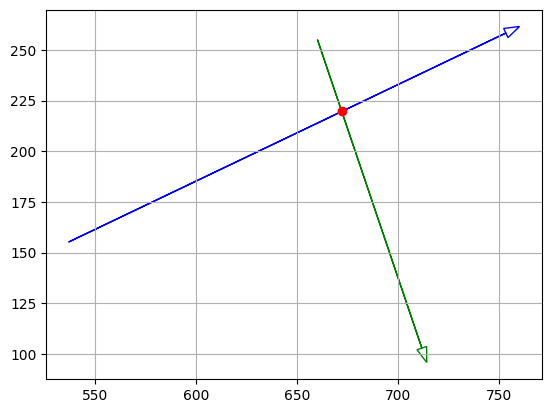

In [29]:
PlotVec (p, u, 'blue')
PlotVec (q, v, 'green')
PlotPnt (g, 'red')
pl.axis ('equal')
pl.grid ()

##### <a href="https://s.geo.admin.ch/a1cdca3cdb">Der Schnittpunkt auf der Karte</a>

## Geraden parametrisiert über die zurückgelegte Strecke

### Länge der Strecken

In [30]:
Lu = la.norm (u)
print (Lu)

247.01535688292734


In [31]:
Lv = la.norm (v)
print (Lv)

168.14520026453326


### Richtungsvektoren skalieren

In [32]:
u0 = u / Lu
print (u0)

[[0.90265643]
 [0.43036191]]


In [33]:
v0 = v / Lv
print (v0)

[[ 0.32136511]
 [-0.94695537]]


#### Jeder Richtungsvektor ist jetzt 1 km lang

In [34]:
la.norm (u0)

1.0

In [35]:
la.norm (v0)

1.0

### Interaktive Zeichnung

In [36]:
def Callback2 (y, z):
    pu = p + y * u0; PlotVec (p, u, 'blue' ); PlotPnt (pu, 'blue' )
    qv = q + z * v0; PlotVec (q, v, 'green'); PlotPnt (qv, 'green')
    pl.axis ('equal')
    pl.grid ()
    
Slider21 = iw.FloatSlider (min = 0.0, max = Lu, step = 0.1, value = Lu / 2.0, description = 'y [km]')
Slider22 = iw.FloatSlider (min = 0.0, max = Lv, step = 0.1, value = Lv / 2.0, description = 'z [km]')
UserInterface2 = iw.HBox ([Slider21, Slider22])
Output2 = iw.interactive_output (Callback2, {'y': Slider21, 'z': Slider22})

display (UserInterface2, Output2)

Output()

## Geraden parametrisiert über die Zeit

### Gerade g: Lausanne Blecherette - St. Gallen Altenrhein

<a href="https://de.wikipedia.org/wiki/Piper_PA-28">Piper PA-28</a>

Reisegeschwindigkeit 100&hellip;140 kn = 180&hellip;260 km/h

### Gerade h: Birrfeld - Lugano

<a href="https://de.wikipedia.org/wiki/Cessna_172">Cessna 172</a>

Reisegeschwindigkeit 120 kn = 222 km/h

### Interaktive Zeichnung

In [37]:
def Callback3 (time, speed):
    u1 = u0 * speed; pu = p + time * u1; PlotVec (p, u, 'blue' ); PlotPnt (pu, 'blue' )
    v1 = v0 * 222.0; qv = q + time * v1; PlotVec (q, v, 'green'); PlotPnt (qv, 'green')
    pl.axis ('equal')
    pl.grid ()

Slider31 = iw.FloatSlider (min = 0.0, max = 1.2, step = 0.001, value = 0.0, description = 't [h]')
Slider32 = iw.FloatSlider (min = 180.0, max = 2600.0, step = 1, value = (180.0 + 260.0)  / 2.0, description = 'v [km/h]')
UserInterface3 = iw.HBox ([Slider31, Slider32])
Output3 = iw.interactive_output (Callback3, {'time': Slider31, 'speed': Slider32})

display (UserInterface3, Output3)

Output()

Kollision bei einer Geschwindigkeit von ca. 885 km/h auf der Strecke Lausanne - St. Gallen <br/>
z. B. mit einem <a href="https://de.wikipedia.org/wiki/Airbus_A330">Airbus A330-200</a>

## Schnittwinkel

### Skalarprodukt

In [38]:
s = np.sum (u * v)
print (s)

-4878.272236000015


### Quotient aus Skalarprodukt und Produkt der Längen ergibt den Cosinus

In [39]:
c = s / (Lu * Lv)
print (c)

-0.11745123937565277


### Winkel

#### im Bogenmass

In [40]:
b = np.arccos (c)
print (b)

1.6885192922907417


#### und im Gradmass

In [41]:
w1 = b * 180.0 / np.pi
print (w1)

96.74502907467614


Komplementärwinkel im Gradmass

In [42]:
w2 = 180 - w1
print (w2)

83.25497092532386
